<a href="https://colab.research.google.com/github/Raven-DM/Data-Science/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

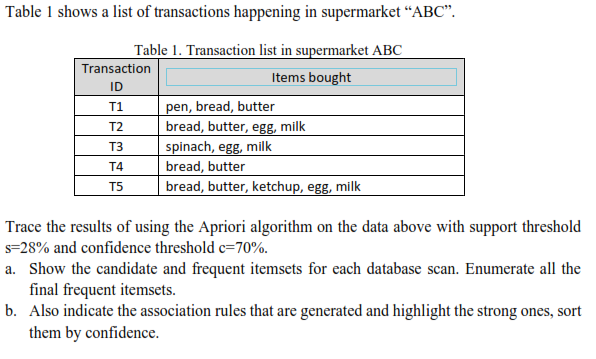

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Your transaction data
transactions = [
    ['pen', 'bread', 'butter'],
    ['bread', 'butter', 'egg', 'milk'],
    ['spinach', 'egg', 'milk'],
    ['bread', 'butter'],
    ['bread', 'butter', 'ketchup', 'egg', 'milk']
]

# Encoding the transactions into a suitable format for Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Finding frequent itemsets with minimum support of 0.28
frequent_itemsets = apriori(df, min_support=0.28, use_colnames=True)

# Generating association rules with minimum confidence of 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Sorting the rules by confidence
#rules = rules.sort_values(by=['confidence'], ascending=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support                    itemsets
0       0.8                     (bread)
1       0.8                    (butter)
2       0.6                       (egg)
3       0.6                      (milk)
4       0.8             (bread, butter)
5       0.4                (bread, egg)
6       0.4               (milk, bread)
7       0.4               (butter, egg)
8       0.4              (milk, butter)
9       0.6                 (milk, egg)
10      0.4        (bread, butter, egg)
11      0.4       (milk, bread, butter)
12      0.4          (milk, bread, egg)
13      0.4         (milk, butter, egg)
14      0.4  (milk, bread, butter, egg)

Association Rules:
              antecedents     consequents  antecedent support  \
0                 (bread)        (butter)                 0.8   
1                (butter)         (bread)                 0.8   
2                  (milk)           (egg)                 0.6   
3                   (egg)          (milk)                 0.6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(te_ary)

[[ True  True False False False  True False]
 [ True  True  True False  True False False]
 [False False  True False  True False  True]
 [ True  True False False False False False]
 [ True  True  True  True  True False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df)

   bread  butter    egg  ketchup   milk    pen  spinach
0   True    True  False    False  False   True    False
1   True    True   True    False   True  False    False
2  False   False   True    False   True  False     True
3   True    True  False    False  False  False    False
4   True    True   True     True   True  False    False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Based on Table 1, which contains transaction data from supermarket ABC, the Apriori Algorithm can be implemented using Python to analyze frequent itemsets within transactions. The Apriori Algorithm relies on two key measures to determine the likelihood of itemsets frequently appearing in transactions, which are subsequently used to generate association rules: support and confidence.

The formulas for calculating support and confidence are as follows:

Support Formula:
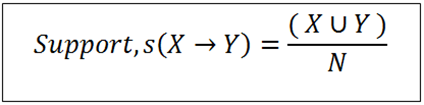

Where:

𝑋
∪
𝑌
X∪Y = Number of transactions containing both items
𝑋
X and
𝑌
Y.
𝑁
N = Total number of transactions.
Confidence Formula:
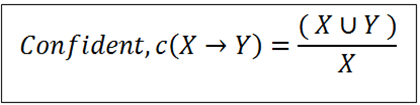

Where:

𝑋
∪
𝑌
X∪Y = Number of transactions containing both items
𝑋
X and
𝑌
Y.
𝑁
N = Number of transactions containing
𝑋
X.
These metrics help identify the strength of the relationship between itemsets and are fundamental in generating association rules within the Apriori Algorithm.

Apriori Algorithm Analysis with Support and Confidence Thresholds
Based on Table 1, without applying any thresholds for support or confidence, there are 39 possible itemsets in transactions, generating a total of 200 association rules.

To address questions (a) and (b), a support threshold (s) of 28% and a confidence threshold (c) of 70% are applied.

a)Frequent Itemsets and Support Values
Candidate 1-itemsets: {pen}, {bread}, {butter}, {egg}, {milk}, {spinach}, {ketchup}

Frequent 1-itemsets: {bread}, {butter}, {egg}, {milk} = {80%, 80%, 60%, 60%}

Candidate 2-itemsets: {bread, butter}, {bread, egg}, {bread, milk}, {butter, egg}, {butter, milk}, {egg, milk}

Frequent 2-itemsets: {bread, butter}, {bread, egg}, {bread, milk}, {butter, egg}, {butter, milk}, {egg, milk} = {80%, 40%, 40%, 40%, 40%, 60%}

Candidate 3-itemsets: {bread, butter, egg}, {bread, egg, milk}, {butter, egg, milk}, {bread, butter, milk}

Frequent 3-itemsets: {bread, butter, egg}, {bread, egg, milk}, {butter, egg, milk}, {bread, butter, milk} = {40%, 40%, 40%, 40%}

Candidate 4-itemsets: {bread, butter, egg, milk}

Frequent 4-itemsets: {bread, butter, egg, milk} = {40%}

b)Association Rules Based on Confidence Values
From the above results, the association rules that meet the confidence threshold of 70% or higher all have 100% confidence, totaling 20 rules. The breakdown of association rules with 100% confidence is as follows:

{bread} => {butter} = 100%
{butter} => {bread} = 100%
{milk} => {egg} = 100%
{egg} => {milk} = 100%
{bread, egg} => {butter} = 100%
{butter, egg} => {bread} = 100%
{milk, egg} => {butter} = 100%
{milk, butter} => {bread} = 100%
{milk, bread} => {egg} = 100%
{bread, egg} => {milk} = 100%
{milk, butter} => {egg} = 100%
{butter, egg} => {milk} = 100%
{milk, bread, butter} => {egg} = 100%
{milk, bread, egg} => {butter} = 100%
{milk, butter, egg} => {bread} = 100%
{bread, butter, egg} => {milk} = 100%
{milk, bread} => {butter, egg} = 100%
{milk, butter} => {bread, egg} = 100%
{bread, egg} => {milk, butter} = 100%
{butter, egg} => {milk, bread} = 100%

This analysis demonstrates the strong associative relationships between itemsets based on the Apriori algorithm.